In [84]:
from bs4 import BeautifulSoup,SoupStrainer
import urllib2
import re
import requests
import datetime
import pandas as pd

In [62]:
url="http://web.engr.oregonstate.edu/cgi-bin/cgiwrap/~mjb/grades550.cgi"
r = requests.get(url)

In [64]:
soup = BeautifulSoup(r.text)

In [65]:
pb = soup.find_all("tr")

In [77]:
allg=[]
test2=[]
test1=[]


In [78]:
for i in range(1,len(pb)):
    px= pb[i].find_all("td")
    allg.append(int(px[26].get_text()))
    test2.append(int(px[24].get_text()))
    test1.append(int(px[23].get_text()))    
    

In [91]:
df=pd.DataFrame([test1,test2,allg]).transpose()

In [92]:
df.head(5)

,0,1,2
0,83,88,1180
1,66,76,1133
2,88,108,1201
3,85,102,1206
4,94,96,1189


In [68]:
import matplotlib.pylab
import numpy as np

In [69]:
%matplotlib inline

In [70]:
import seaborn as sb

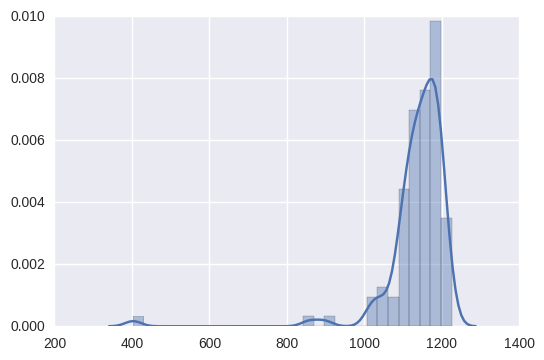

In [71]:
sb.distplot(allg)

In [72]:
np.mean(allg),np.std(allg),max(allg),min(allg)

(1135.9130434782608, 89.224637386902259, 1225, 403)

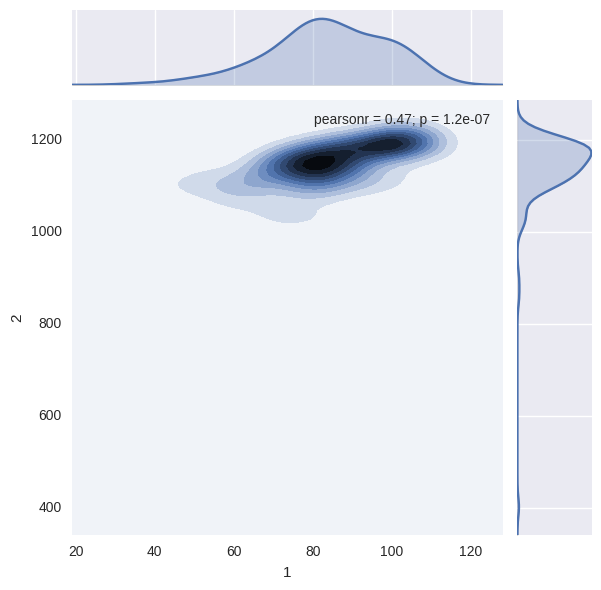

In [97]:
sb.jointplot(x=1, y=2, data=df, kind="kde");

In [58]:
len([x for x in allg if x<=1100])

19

In [24]:
int(px[26].get_text())

1180

In [16]:
url ='http://www.bbc.com/sport/football/gossip'
r = requests.get(url)

In [113]:
soup = BeautifulSoup(r.text)

In [123]:
published_date = soup.find_all('meta',property='rnews:datePublished')[0]['content']

In [149]:
class Gossip(Base):
    """
    A table to store the gossips
    """
    __tablename__ ='gossip'
    id = Column(Integer,primary_key=True)
    created=Column(DateTime)
    article=Column(String)
    link = Column(String,unique=True)
Base.metadata.create_all(engine)

In [168]:
published_date.split(' ')[0]

'2016/07/25'

In [47]:
gossips = soup.find_all("div",class_='story-body')

In [130]:
pars= gossips[0].find_all("p")
all_gossip=[]
for par in pars:
        #all_gossips[]
        all_gossip.append([published_date,par.get_text(),None if par.a is None else par.a['href']])
        

In [131]:
import pandas as pd

In [154]:
df = pd.DataFrame(all_gossip,columns=["created","article","link"])

In [179]:
#file_name = "gossips_on_"+published_date.split('/')[0:2]+".csv"
df.to_csv("fill.csv")

UnicodeEncodeError: 'ascii' codec can't encode character u'\xa3' in position 46: ordinal not in range(128)

In [175]:
published_date.split('/')[0:2]

['2016', '07']